In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('BCancer.csv');

print("\n \t The data frame has {0[0]} rows and {0[1]} columns. \n".format(data.shape))
# data.info()


 	 The data frame has 569 rows and 33 columns. 



In [ ]:
data.drop(data.columns[[-1, 0]], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [ ]:
diagnosis_all = list(data.shape)[0]
diagnosis_categories = list(data['diagnosis'].value_counts())

print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, 
                                                                                 diagnosis_categories[0], 
                                                                                 diagnosis_categories[1]))


 	 The data has 569 diagnosis, 357 malignant and 212 benign.


In [ ]:
#Need to apply SMOTE here!



In [ ]:
features_mean=['radius_mean',
 'texture_mean',
 'smoothness_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
    'radius_se',
 'texture_se',
 'smoothness_se',
 'concave points_se',
 'symmetry_se',
]



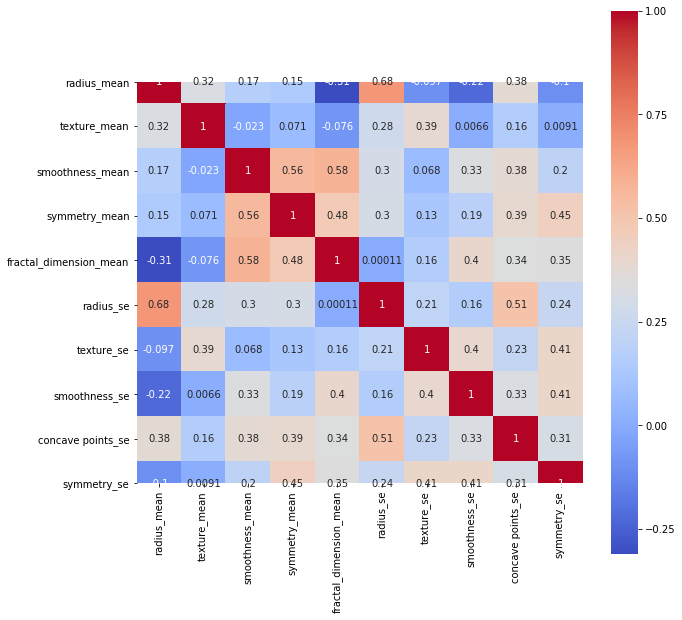

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

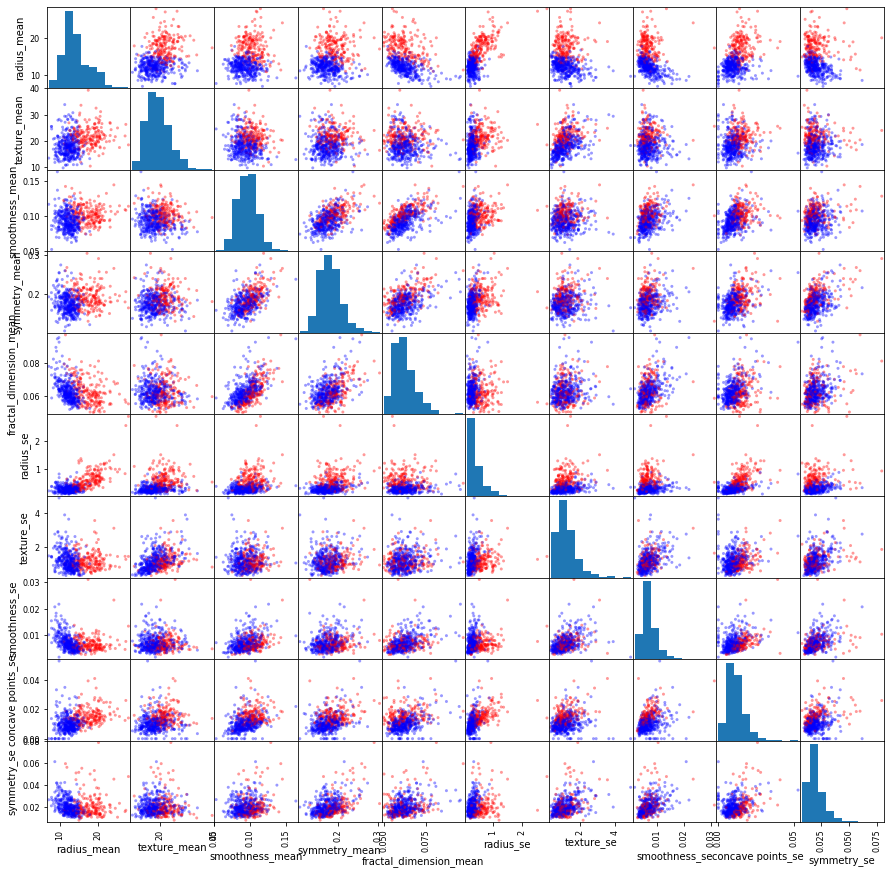

In [ ]:
from pandas.plotting import scatter_matrix

color_dic = {'M':'red', 'B':'blue'}
colors = data['diagnosis'].map(lambda x: color_dic.get(x))

sm = scatter_matrix(data[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()


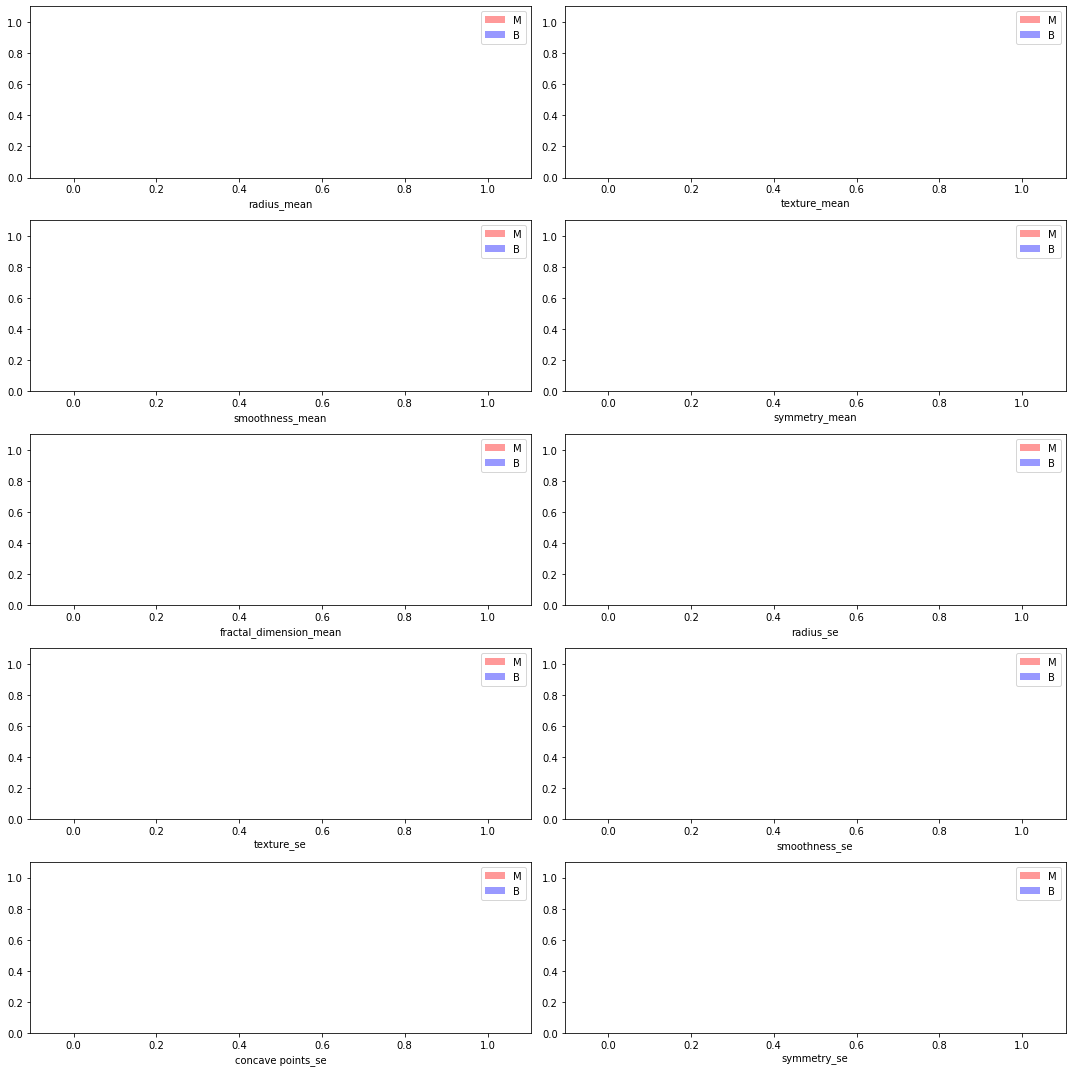

In [ ]:
features_mean
bins = 16
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M');
    sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blue', label='B');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:

features_selection = features_mean
features_selection
# data['fractal_dimension_mean'].isnull().sum()

['radius_mean',
 'texture_mean',
 'smoothness_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'concave points_se',
 'symmetry_se']

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time


In [ ]:
# diag_map = {'M':1, 'B':0}
from sklearn.preprocessing import LabelEncoder
data['diagnosis'] = LabelEncoder().fit_transform(data['diagnosis'])

#You can use label encoder here!

In [ ]:
X = data.loc[:,features_selection]
y = data.loc[:, 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
cvs_all = []


print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 


print('After OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

data['diagnosis'].isnull().sum()

Before OverSampling, counts of label '1': 169
Before OverSampling, counts of label '0': 286 

After OverSampling, the shape of train_X: (455, 10)
After OverSampling, the shape of train_y: (455,) 

After OverSampling, counts of label '1': 286
After OverSampling, counts of label '0': 286


0

In [ ]:
from sklearn.linear_model import SGDClassifier

start = time.time()

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

SGD Classifier Accuracy: 88.60%
Cross validation score: 78.41% (+/- 25.41%)
Execution time: 0.094965 seconds 



In [ ]:
from sklearn.svm import SVC, NuSVC, LinearSVC

start = time.time()

clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = NuSVC()
clf.fit(X_train, y_train)
prediciton = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("NuSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = LinearSVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("LinearSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

SVC Accuracy: 91.23%
Cross validation score: 88.23% (+/- 6.69%)
Execution time: 0.13633 seconds 

NuSVC Accuracy: 91.23%
Cross validation score: 87.70% (+/- 8.36%)
Execution time: 0.17081 seconds 

LinearSVC Accuracy: 93.86%
Cross validation score: 88.41% (+/- 7.78%)
Execution time: 0.28478 seconds 



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 91.23%
Cross validation score: 88.40% (+/- 6.95%)
Execution time: 0.13568 seconds 



In [ ]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 90.35%
Cross validation score: 88.23% (+/- 6.69%)
Execution time: 0.094375 seconds 



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

start = time.time()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Extra Trees Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Random Forest Accuracy: 95.61%
Cross validation score: 93.15% (+/- 5.80%)
Execution time: 1.9699 seconds 

Extra Trees Accuracy: 97.37%
Cross validation score: 93.15% (+/- 3.39%)
Execution time: 1.4686 seconds 

Dedicion Tree Accuracy: 93.86%
Cross validation score: 88.93% (+/- 5.49%)
Execution time: 0.089063 seconds 

